In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#Going to try going in through the API in order to grab as much relevant data as possible
import json
import requests
from pprint import pprint

In [2]:
#Outer-most layer
base_url = "https://chicagohealthatlas.org/api/v1/"
outer_layer = requests.get(base_url).json()
pprint(outer_layer)

{'Atlas': 'https://chicagohealthatlas.org/api/v1/atlas/',
 'Categories': 'https://chicagohealthatlas.org/api/v1/categories/',
 'Colors': 'https://chicagohealthatlas.org/api/v1/colors/',
 'Data': 'https://chicagohealthatlas.org/api/v1/data/',
 'Data Coverage': 'https://chicagohealthatlas.org/api/v1/coverage/',
 'Datasets': 'https://chicagohealthatlas.org/api/v1/datasets/',
 'Geographic layers': 'https://chicagohealthatlas.org/api/v1/layers/',
 'Geographies': 'https://chicagohealthatlas.org/api/v1/geographies/',
 'Periods': 'https://chicagohealthatlas.org/api/v1/periods/',
 'Regions': 'https://chicagohealthatlas.org/api/v1/regions/',
 'Stratification Groupings': 'https://chicagohealthatlas.org/api/v1/population-groupings/',
 'Stratifications': 'https://chicagohealthatlas.org/api/v1/populations/',
 'Terms': 'https://chicagohealthatlas.org/api/v1/terms/',
 'Topics': 'https://chicagohealthatlas.org/api/v1/topics/'}


In [3]:
#Atlas
atlas_url = outer_layer['Atlas']

In [4]:
#Categories

In [5]:
#Colors

In [6]:
#Data

In [28]:
#Data Coverage [1/...]
data_cov_url = outer_layer['Data Coverage']
# data_cov_json = requests.get(data_cov_url).json()
# pprint(data_cov_json) #Response: {'detail': 'No topic key provided.'}
# Need to use endpoint URL /api/v1/coverage/<topic_key>/

#Starting with topic 'Accidents mortality' with key 'VRAC'
acc_mort_url = data_cov_url + 'VRAC'
acc_mort_json = requests.get(acc_mort_url).json()
pprint(acc_mort_json)

{'coverages': {'neighborhood': [{'period': '2015-2019', 'population': ''},
                                {'period': '2014-2018', 'population': ''},
                                {'period': '2013-2017', 'population': ''},
                                {'period': '2012-2016', 'population': ''},
                                {'period': '2011-2015', 'population': ''},
                                {'period': '2010-2014', 'population': ''},
                                {'period': '2005-2009', 'population': ''},
                                {'period': '2000-2004', 'population': ''}],
               'place': [{'period': '2020', 'population': ''},
                         {'period': '2015-2019', 'population': ''},
                         {'period': '2019', 'population': ''},
                         {'period': '2014-2018', 'population': ''},
                         {'period': '2018', 'population': ''},
                         {'period': '2017', 'population': ''},
           

In [29]:
#Data coverage (cont'd) [2/...]

#Looking at 'Presciption opiate misuse' with key 'HCSOP' to see one that only has data from a few neighborhoods
op_mis_url = data_cov_url + 'HCSOP'
op_mis_json = requests.get(op_mis_url).json()
pprint(op_mis_json)

{'coverages': {'neighborhood': [{'period': '2020-2021', 'population': ''}],
               'place': [{'period': '2020-2021', 'population': ''},
                         {'period': '2021', 'population': ''},
                         {'period': '2020', 'population': ''},
                         {'period': '2018', 'population': ''},
                         {'period': '2017', 'population': ''},
                         {'period': '2016', 'population': ''},
                         {'period': '2015', 'population': ''},
                         {'period': '2021', 'population': 'F'},
                         {'period': '2020', 'population': 'F'},
                         {'period': '2018', 'population': 'F'},
                         {'period': '2017', 'population': 'F'},
                         {'period': '2016', 'population': 'F'},
                         {'period': '2015', 'population': 'F'},
                         {'period': '2021', 'population': 'M'},
                         {'per

In [30]:
#Data coverage (cont'd) [3/...]
#
# Ok, that doesn't look any different, so if we want to see the neighborhood coverage we'll need to get that data from
# somewhere else

# Let's first look at one we know only has city-wide coverage...
# 'Youth binge drinking' with key 'YRBD'
y_drink_url = data_cov_url + 'YRBD'
y_drink_json = requests.get(y_drink_url).json()
pprint(y_drink_json)

{'coverages': {'neighborhood': [],
               'place': [{'period': '2019', 'population': ''},
                         {'period': '2017', 'population': ''},
                         {'period': '2019', 'population': 'F'},
                         {'period': '2017', 'population': 'F'},
                         {'period': '2019', 'population': 'M'},
                         {'period': '2017', 'population': 'M'},
                         {'period': '2019', 'population': 'W'},
                         {'period': '2017', 'population': 'W'},
                         {'period': '2017', 'population': 'B'},
                         {'period': '2019', 'population': 'H'},
                         {'period': '2017', 'population': 'H'},
                         {'period': '2019', 'population': 'E'},
                         {'period': '2017', 'population': 'E'},
                         {'period': '2019', 'population': 'L'},
                         {'period': '2017', 'population': 'L'}],
      

In [34]:
#Data coverage (cont'd) [4/...]
#
# Yeah, that gives an empty result for 'neighborhood.'
#
# Going to try to automate the creation of a bar chat plotting the number of indicators covered for each year...
# First, copy the topics dictionary from below to use keys in automated search
all_topics_json = requests.get(topics_url + '?limit=284').json()
topic_names_list = list()
for x in range(284):
       topic_names_list.append(all_topics_json['results'][x]['name'])
topic_keys_list = []
for x in range(284):
       topic_keys_list.append(all_topics_json['results'][x]['key'])

topics_dict={}        
for x in range(284):
    topics_dict[topic_keys_list[x]]=topic_names_list[x]

In [40]:
#Data coverage (cont'd) [5/...]
#
# Create period coverage dictionary
period_cov_dict={}

# Loop over keys in topics dictionary  
for key in topics_dict:
    topic_cov_url = data_cov_url + key
    topic_cov_json = requests.get(topic_cov_url).json()
    for x in range(len(topic_cov_json['coverages']['place'])):
        if topic_cov_json['coverages']['place'][x]['population'] == '':
            if period_cov_dict.get(topic_cov_json['coverages']['place'][x]['period']) == None:
                period_cov_dict[topic_cov_json['coverages']['place'][x]['period']] = 1
            else:
                period_cov_dict[topic_cov_json['coverages']['place'][x]['period']] = \
                    period_cov_dict.get(topic_cov_json['coverages']['place'][x]['period']) + 1

period_cov_dict

{'2020': 139,
 '2015-2019': 94,
 '2019': 150,
 '2014-2018': 96,
 '2018': 168,
 '2017': 225,
 '2016': 203,
 '2015': 184,
 '2014': 175,
 '2013': 161,
 '2012': 140,
 '2011': 158,
 '2010': 131,
 '2009': 107,
 '2008': 87,
 '2007': 105,
 '2006': 87,
 '2005': 103,
 '2004': 87,
 '2003': 101,
 '2002': 87,
 '2001': 101,
 '2000': 87,
 '2020-2021': 52,
 '2021': 68,
 '2017-2021': 9,
 '2016-2020': 39,
 '2013-2017': 32,
 '2012-2016': 29,
 '2011-2015': 34,
 '2010-2014': 31,
 '2009-2013': 34,
 '2008-2012': 31,
 '2007-2011': 24,
 '2006-2010': 28,
 '2005-2009': 17,
 '2004-2008': 20,
 '2003-2007': 16,
 '2002-2006': 13,
 '2001-2005': 16,
 '2000-2004': 13,
 '1999-2003': 16,
 '1998-2002': 13,
 '1997-2001': 10,
 '1996-2000': 13,
 '1995-1999': 13,
 '1999': 12,
 '1994-1998': 17,
 '1998': 12,
 '1993-1997': 13,
 '1997': 12,
 '1992-1996': 10,
 '1996': 12,
 '1991-1995': 13,
 '1995': 10,
 '1990-1994': 13,
 '1994': 10,
 '1989-1993': 17,
 '1993': 10,
 '1988-1992': 13,
 '1992': 10,
 '1987-1991': 10,
 '1991': 10,
 '1986

In [58]:
#Data coverage (cont'd) [7/...]
#
# Let's save that dictionary to a csv, it took a while to run through all the API calls
csv_columns = ['Year','Indicator Coverage']
csv_file = "Resources/PeriodCoverage.csv"
with open(csv_file, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in period_cov_dict:
            writer.writerow(data)

AttributeError: 'str' object has no attribute 'keys'

<BarContainer object of 36 artists>

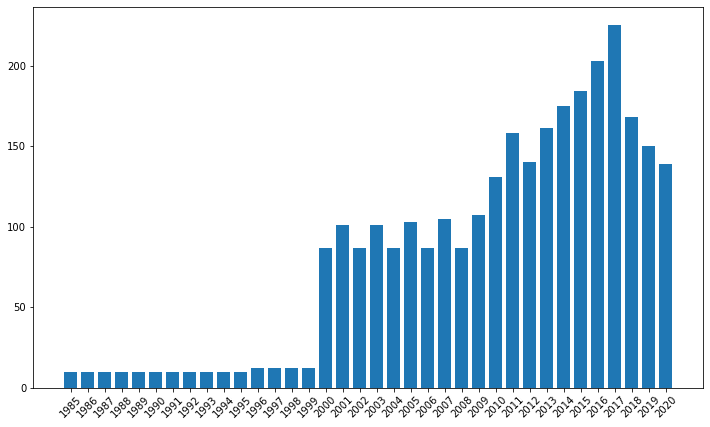

In [56]:
#Data coverage (cont'd) [8/...]
#
# Wow! That worked on the first try! Now to make a bar chart from that data...
# Let's first clean up that data to only keep the single year keys...

single_yr_cov_dict = {}
single_yr_keys = [year for year in range(1985,2021)]

for year in single_yr_keys:
    single_yr_cov_dict[year] = period_cov_dict[str(year)]

plt.figure(figsize=(12,7))
plt.xticks(rotation = 45)
display(plt.bar(range(len(single_yr_cov_dict)),list(single_yr_cov_dict.values()),
       tick_label = list(single_yr_cov_dict.keys())))
plt.savefig('Resources/single_year_coverage_bars.png',format='png')

In [9]:
#Datasets

In [10]:
#Geographic layers

In [11]:
#Geographies

In [12]:
#Periods

In [13]:
#Regions

In [14]:
#Stratification groupings

In [15]:
#Stratifications

In [16]:
#Terms

In [26]:
#Topics
topics_url = outer_layer['Topics']
topics_json = requests.get(topics_url).json()
#pprint(topics_json) #There are 284 topics
# topic_names_list = list()
# for x in range(284):
#        topic_names_list.append(topics_json['results'][x]['name'])
# topic_names_list

#Default response is limited to 20 results, need to set limit with parameter

# Moved the code block below up to the Data coverage section to use topic keys there
#
# all_topics_json = requests.get(topics_url + '?limit=284').json()
# topic_names_list = list()
# for x in range(284):
#        topic_names_list.append(all_topics_json['results'][x]['name'])
# topic_keys_list = []
# for x in range(284):
#        topic_keys_list.append(all_topics_json['results'][x]['key'])

# topics_dict={}        
# for x in range(284):
#     topics_dict[topic_keys_list[x]]=topic_names_list[x]
topics_dict

{'VRAC': 'Accidents mortality',
 'VRACR': 'Accidents mortality rate',
 'HCSATH': 'Adult asthma',
 'HCSATHP': 'Adult asthma rate',
 'HCSBD': 'Adult binge drinking',
 'HCSBDP': 'Adult binge drinking rate',
 'HCSDIA': 'Adult diabetes',
 'HCSDIAP': 'Adult diabetes rate',
 'HCSEC': 'Adult e-cigarette use',
 'HCSECP': 'Adult e-cigarette use rate',
 'HCSFLU': 'Adult flu vaccination',
 'HCSFLUP': 'Adult flu vaccination rate',
 'HCSFV': 'Adult fruit and vegetable servings',
 'HCSFVP': 'Adult fruit and vegetable servings rate',
 'HCSOB': 'Adult obesity',
 'HCSOBP': 'Adult obesity rate',
 'HCSPA': 'Adult physical inactivity',
 'HCSPAP': 'Adult physical inactivity rate',
 'HCSSMK': 'Adult smoking',
 'HCSSMKP': 'Adult smoking rate',
 'HCSS': 'Adult soda consumption',
 'HCSSP': 'Adult soda consumption rate',
 'CZA': 'Aggravated assault/battery',
 'VRAL': 'Alcohol-induced mortality',
 'VRALR': 'Alcohol-induced mortality rate',
 'HDALR': 'Alcohol-related hospitalization rate',
 'HDAL': 'Alcohol-relate